In [1]:
#@title Installing Pytorch

!pip install torch
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#@title Import Dependencies

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [3]:
#@title Define Hyperparameters

input_size = 784 # img_size = (28,28) ---> 28*28=784 in total
hidden_size = 500 # number of nodes at hidden layer
num_classes = 10 # number of output classes discrete range [0,9]
num_epochs = 20 # number of times which the entire dataset is passed throughout the model
batch_size = 100 # the size of input data took for one iteration
lr = 1e-3 # size of step 

In [4]:
#@title Downloading MNIST data

train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
#@title Loading the data

train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size, 
                                      shuffle = False)

In [6]:
#@title Define model class

class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [7]:
#@title Build the model

net = Net(input_size, hidden_size, num_classes)
if torch.cuda.is_available():
  net.cuda()

In [8]:
#@title Define loss-function & optimizer

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=lr)

In [9]:
#@title Training the model

for epoch in range(num_epochs):
  for i ,(images,labels) in enumerate(train_gen):
    images = Variable(images.view(-1,28*28)).cuda()
    labels = Variable(labels).cuda()
    
    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()
    
    if (i+1) % 100 == 0:
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.data))

Epoch [1/20], Step [100/600], Loss: 0.2862
Epoch [1/20], Step [200/600], Loss: 0.3002
Epoch [1/20], Step [300/600], Loss: 0.1300
Epoch [1/20], Step [400/600], Loss: 0.3404
Epoch [1/20], Step [500/600], Loss: 0.1946
Epoch [1/20], Step [600/600], Loss: 0.1431
Epoch [2/20], Step [100/600], Loss: 0.0495
Epoch [2/20], Step [200/600], Loss: 0.0743
Epoch [2/20], Step [300/600], Loss: 0.0876
Epoch [2/20], Step [400/600], Loss: 0.0481
Epoch [2/20], Step [500/600], Loss: 0.0475
Epoch [2/20], Step [600/600], Loss: 0.0561
Epoch [3/20], Step [100/600], Loss: 0.0550
Epoch [3/20], Step [200/600], Loss: 0.0711
Epoch [3/20], Step [300/600], Loss: 0.0652
Epoch [3/20], Step [400/600], Loss: 0.0471
Epoch [3/20], Step [500/600], Loss: 0.1008
Epoch [3/20], Step [600/600], Loss: 0.0563
Epoch [4/20], Step [100/600], Loss: 0.0953
Epoch [4/20], Step [200/600], Loss: 0.0342
Epoch [4/20], Step [300/600], Loss: 0.0611
Epoch [4/20], Step [400/600], Loss: 0.0422
Epoch [4/20], Step [500/600], Loss: 0.1418
Epoch [4/20

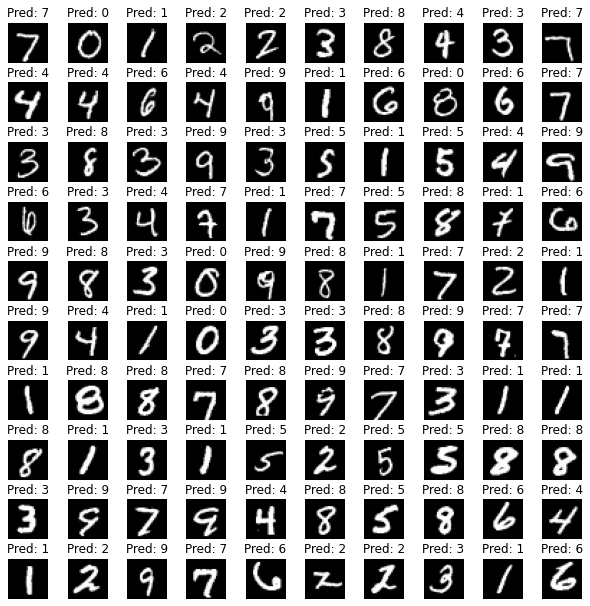

Accuracy of the model: 98.120 %


In [10]:
#@title Evaluating the accuracy of the model
from matplotlib import pyplot as plt
import math

correct = 0
total = 0
plt.rcParams['figure.figsize'] = [10, 10]
f, axarr = plt.subplots(10,10)
counter = 0
row = 0
col = 0

for images,labels in test_gen:
  img_to_show = images.view(-1,28*28)[counter]
  images = Variable(images.view(-1,28*28)).cuda()
  
  row = int(math.floor((counter / 10)))
  col = counter % 10

  axarr[row,col].imshow(img_to_show.reshape(28,28), cmap="gray")
  axarr[row,col].axis('off')


  labels = labels.cuda()
  
  output = net(images)
  
  axarr[row,col].title.set_text("Pred: {}".format(output.data.max(1, keepdim=True)[1][counter].item()))
  _, predicted = torch.max(output,1)
  
  correct += (predicted == labels).sum()
  total += labels.size(0)
  counter = counter+1
plt.axis('off')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.5)
plt.show()
print('Accuracy of the model: %.3f %%' %((100*correct)/(total+1)))